# Reliance Stock Analysis on may - 7 - 2018 
### by Bibhash Kalita
 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 5, 12)
reliance = web.DataReader("NSE/RELIANCE", 'quandl', start, end)

In [5]:
reliance.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs
Date,,,,,,,
2018-05-11,981.25,991.30,977.75,986.00,989.25,4011516.0,39587.24
2018-05-10,980.00,984.60,974.25,979.15,981.15,4014645.0,39370.24
2018-05-09,965.90,984.30,962.25,976.20,976.70,4494423.0,43757.40
2018-05-08,977.50,982.00,965.20,966.00,967.10,4934036.0,47979.15
2018-05-07,958.85,973.25,956.35,971.90,971.00,3512532.0,33854.51


In [6]:
reliance['TurnoverLacs'].mean()

61184.119020771526

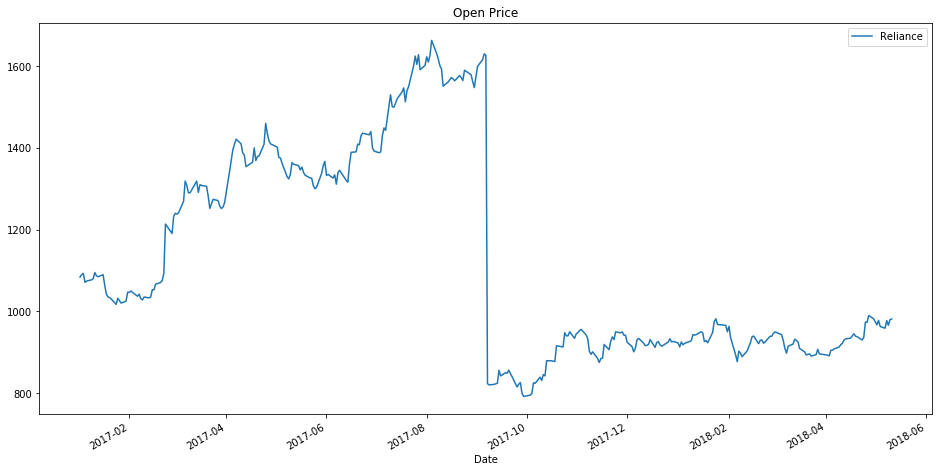

In [7]:
reliance['Open'].plot(label='Reliance',figsize=(16,8),title='Open Price')
plt.legend()

In [8]:
reliance['Open'].argmax()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2017-08-04 00:00:00')

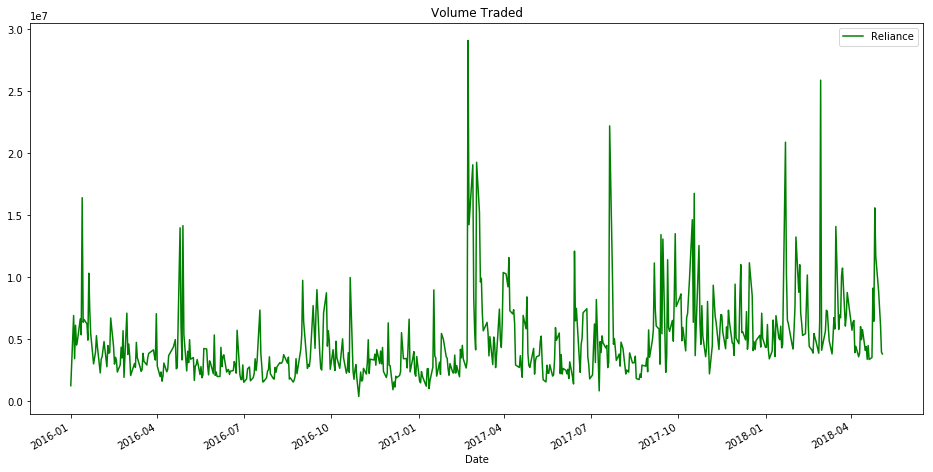

In [63]:
reliance['TotalTradeQuantity'].plot(label='Reliance',figsize=(16,8),title='Volume Traded',color ='green')
plt.legend()

In [48]:
reliance['total Traded'] = reliance['Open'] * reliance['TotalTradeQuantity']

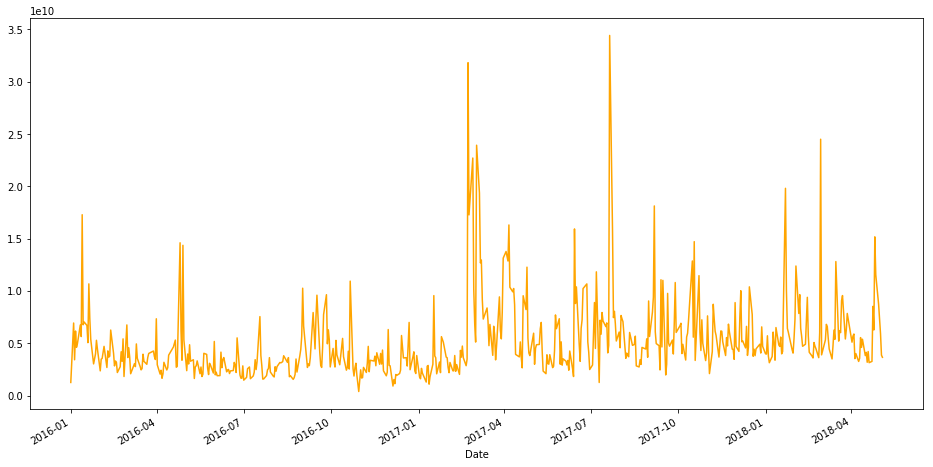

In [49]:
reliance['total Traded'].plot(label='Reliance',figsize=(16,8),color='orange')

In [50]:
reliance['returns'] = (reliance['Close'] / reliance['Close'].shift(1) ) - 1

In [51]:
reliance.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,total Traded,returns
Date,,,,,,,,,
2018-05-04,962.85,964.7,950.00,953.6,953.95,3795692.0,36236.86,3.654682e+09,NaN
2018-05-03,977.90,977.9,959.25,962.0,961.60,3947546.0,38065.13,3.860305e+09,0.008019
2018-05-02,967.00,979.2,965.05,974.8,972.70,6117761.0,59546.55,5.915875e+09,0.011543
2018-04-30,982.00,992.6,960.00,963.5,963.30,8871802.0,86002.70,8.712110e+09,-0.009664
2018-04-27,989.80,1011.0,985.50,996.5,996.30,11666267.0,116658.73,1.154727e+10,0.034257


### or i can use the method .pct_change(1) for getting daily percentage change

In [52]:
reliance['returns'] = reliance['Close'].pct_change(1)

In [53]:
reliance.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,total Traded,returns
Date,,,,,,,,,
2018-05-04,962.85,964.7,950.00,953.6,953.95,3795692.0,36236.86,3.654682e+09,NaN
2018-05-03,977.90,977.9,959.25,962.0,961.60,3947546.0,38065.13,3.860305e+09,0.008019
2018-05-02,967.00,979.2,965.05,974.8,972.70,6117761.0,59546.55,5.915875e+09,0.011543
2018-04-30,982.00,992.6,960.00,963.5,963.30,8871802.0,86002.70,8.712110e+09,-0.009664
2018-04-27,989.80,1011.0,985.50,996.5,996.30,11666267.0,116658.73,1.154727e+10,0.034257


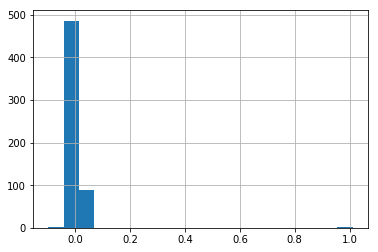

In [54]:
reliance['returns'].hist(bins = 20)

## plot using kde graph 

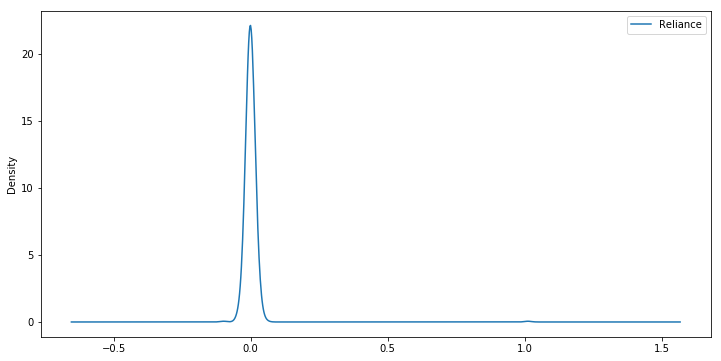

In [55]:
reliance['returns'].plot(kind='kde',label='Reliance',figsize=(12,6))
plt.legend()

In [56]:
box_df = pd.concat([reliance['returns']],axis = 1)

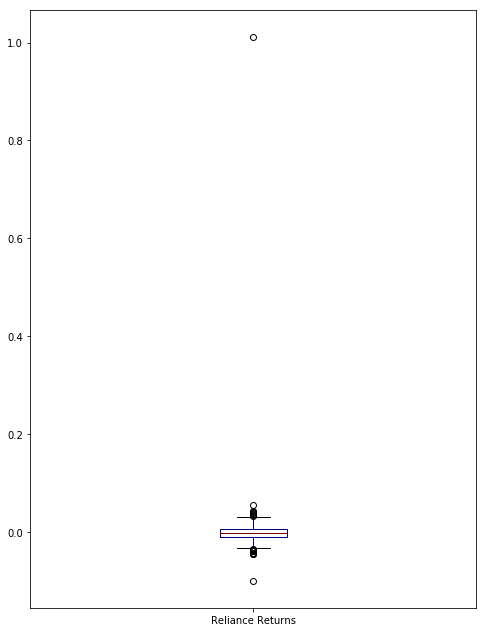

In [57]:
box_df.columns = ['Reliance Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

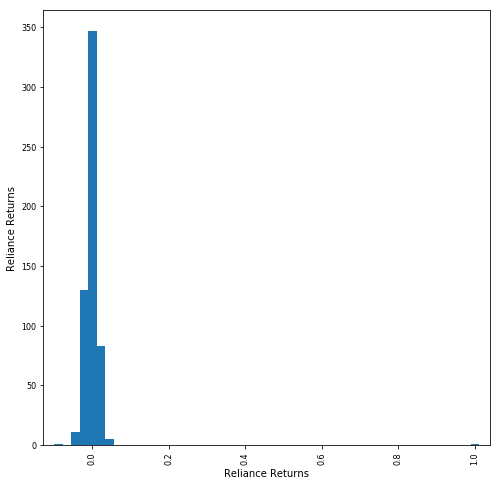

In [58]:
from pandas.plotting import scatter_matrix
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be


     Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%


**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows


          Date                       Cumulative Return         %Cumulative Return
        01/01/2018                  10/10 =  1                         100 %   
        01/02/2018                  15/10 =  3/2                       150 %
        01/03/2018                  20/10 =  2                         200 %
        01/04/2018                  25/10 =  5/2                       250 %

### The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

In [59]:
reliance['cumulative return'] = (1+reliance['returns']).cumprod()

In [60]:
reliance.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,total Traded,returns,cumulative return
Date,,,,,,,,,,
2018-05-04,962.85,964.7,950.00,953.6,953.95,3795692.0,36236.86,3.654682e+09,NaN,NaN
2018-05-03,977.90,977.9,959.25,962.0,961.60,3947546.0,38065.13,3.860305e+09,0.008019,1.008019
2018-05-02,967.00,979.2,965.05,974.8,972.70,6117761.0,59546.55,5.915875e+09,0.011543,1.019655
2018-04-30,982.00,992.6,960.00,963.5,963.30,8871802.0,86002.70,8.712110e+09,-0.009664,1.009801
2018-04-27,989.80,1011.0,985.50,996.5,996.30,11666267.0,116658.73,1.154727e+10,0.034257,1.044394


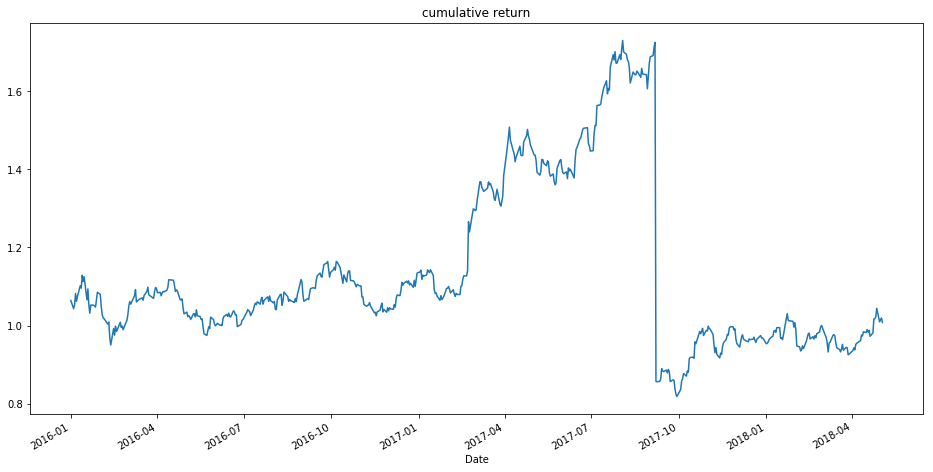

In [61]:
reliance['cumulative return'].plot(label='reliance',figsize=(16,8),title='cumulative return')

# Thank You